<a href="https://colab.research.google.com/github/CamiLopez15/DeepLearning/blob/main/Proyecto_2_Detecci%C3%B3n_de_enfermedades_Lopez_y_JaraFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descomprimir el archivo zip cargado en Google Colab
import zipfile
import os

# Ruta al archivo ZIP cargado
zip_file_path = '/archive.zip'  # Cambia el nombre si es diferente

# Ruta de destino para extraer los archivos
extract_dir = '/plantdisease'

# Descomprimir el archivo
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✔️ Archivos extraídos en: {extract_dir}")


✔️ Archivos extraídos en: /plantdisease


In [2]:
import os
import shutil
import random

# Ruta original con todas las clases
source_dir = '/plantdisease/PlantVillage'

# Nueva ruta para almacenar las imágenes de prueba
test_samples_dir = '/plantdisease/test_samples'

# Crear carpeta de destino si no existe
if not os.path.exists(test_samples_dir):
    os.makedirs(test_samples_dir)

# Recorrer cada subcarpeta (clase) en la carpeta de entrenamiento
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)

    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        selected_images = random.sample(images, min(100, len(images)))

        dest_class_path = os.path.join(test_samples_dir, class_name)
        os.makedirs(dest_class_path, exist_ok=True)

        for img_name in selected_images:
            src_img_path = os.path.join(class_path, img_name)
            dest_img_path = os.path.join(dest_class_path, img_name)
            shutil.move(src_img_path, dest_img_path)

print("✔️ Selección y traslado de imágenes de prueba completado.")


✔️ Selección y traslado de imágenes de prueba completado.


Found 15011 images belonging to 10 classes.
Found 15011 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 255s 528ms/step - accuracy: 0.3798 - loss: 1.9012 - val_accuracy: 0.5486 - val_loss: 1.6151
Epoch 2/25
  1/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.5312 - loss: 1.0558

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.5312 - loss: 1.0558 - val_accuracy: 0.5309 - val_loss: 1.6597
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 260s 555ms/step - accuracy: 0.6972 - loss: 0.8656 - val_accuracy: 0.6094 - val_loss: 1.6749
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.8438 - loss: 0.6567 - val_accuracy: 0.5940 - val_loss: 1.8292
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 291s 545ms/step - accuracy: 0.7604 - loss: 0.6629 - val_accuracy: 0.7766 - val_loss: 0.6849
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8438 - loss: 0.5360 - val_accuracy: 0.8011 - val_loss: 0.5910
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 322s 602ms/step - accuracy: 0.7984 - loss: 0.5629 - val_accuracy: 0.7631 - val_loss: 0.8866
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9375 - loss: 0.3204 - val_accuracy: 0.7719 - val_loss: 0.8278
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 261s 557ms/step - accuracy: 0.8108 - loss: 0.5338 - val

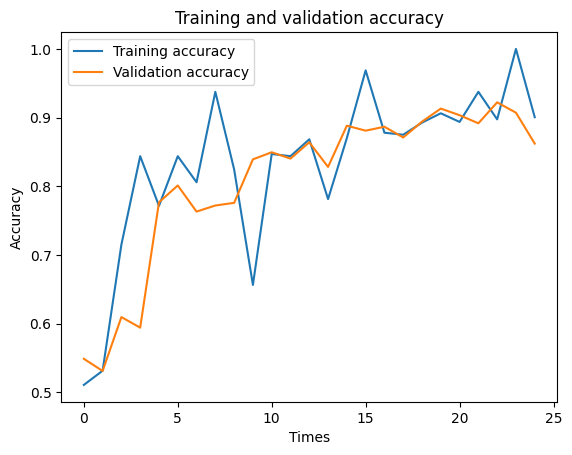

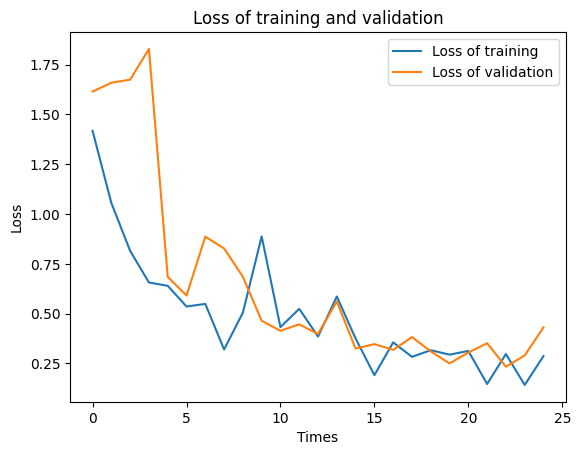

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directorio de entrenamiento y validación
train_dir = '/plantdisease/PlantVillage'
test_dir = '/plantdisease/PlantVillage'  # Para validación durante entrenamiento

# Crear generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento (más épocas)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,  # AUMENTADO para mejor precisión
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

# Evaluación
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"🔎 Validation accuracy: {validation_accuracy:.4f}")
print(f"🔎 Loss of validation: {validation_loss:.4f}")

# Gráficas
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Times')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

plt.plot(history.history['loss'], label='Loss of training')
plt.plot(history.history['val_loss'], label='Loss of validation')
plt.xlabel('Times')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of training and validation')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


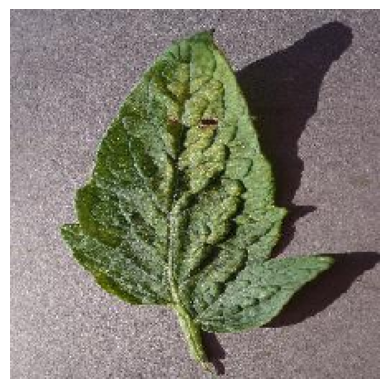

📸 File name: e1ba0c90-f560-4c89-beaf-6ca97802824e___Com.G_SpM_FL 1712.JPG
🧠 Disease detected: Tomato_healthy (99.82% trust)
🌿 Note: Your plant is healthy. Continue with normal care.🌿


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

# Ruta al set de prueba
test_path = '/plantdisease/test_samples'

# Obtener todas las rutas de imágenes
image_paths = []
for root, dirs, files in os.walk(test_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

# Elegir una imagen aleatoria
img_path = random.choice(image_paths)
img_filename = os.path.basename(img_path)  # Extrae solo el nombre del archivo

# Cargar la imagen
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

# Filtro de reducción de ruido
img_array_denoised = cv2.bilateralFilter(img_array.astype(np.uint8), d=9, sigmaColor=25, sigmaSpace=25)

# Preprocesamiento
img_array_denoised = np.expand_dims(img_array_denoised, axis=0)
img_array_denoised = img_array_denoised / 255.0

# Predicción
predicciones = model.predict(img_array_denoised)
clase_predicha = np.argmax(predicciones, axis=1)
probabilidad = np.max(predicciones) * 100  # Confianza en porcentaje

# Diccionario de clases
clases = train_generator.class_indices
clases = {v: k for k, v in clases.items()}

# Diccionario de remedios naturales
remedios_naturales = {
    "Tomato_Bacterial_spot": "Apply a solution of baking soda and water to the leaves.",
    "Tomato_Early_blight": "Use garlic extract or a horsetail infusion to spray the leaves.",
    "Tomato_Late_blight": "Apply a mixture of milk diluted in water (1:10) as a natural fungicide.",
    "Tomato_Leaf_Mold": "Improve ventilation of the plants and use a solution of vinegar and water.",
    "Tomato_Septoria_leaf_spot": "Make chamomile tea and use it as an antifungal spray.",
    "Tomato_Spider_mites_Two_spotted_spider_mite": "Spray water with potassium soap to eliminate mites.",
    "Tomato__Target_Spot": "Apply neem oil to reduce the spread of the fungus.",
    "Tomato__Tomato_YellowLeaf__Curl_Virus": "There is no cure, but you can control vectors like the whitefly.",
    "Tomato__Tomato_mosaic_virus": "Prevent spread by removing infected leaves and disinfecting tools.",
    "Tomato_healthy": "Your plant is healthy. Continue with normal care.🌿"
}

# Resultado
enfermedad_detectada = clases[clase_predicha[0]]
remedio = remedios_naturales.get(enfermedad_detectada, "No information was found for this disease.")

# Mostrar imagen y resultados
plt.imshow(img)
plt.axis('off')
plt.show()

# Imprimir en consola también
print(f"📸 File name: {img_filename}")
print(f"🧠 Disease detected: {enfermedad_detectada} ({probabilidad:.2f}% trust)")
print(f"🌿 Note: {remedio}")
